# Churn Prediction

#### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

### Import Library

In [296]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.simplefilter("ignore")

### Read Data

In [198]:
data=pd.read_csv("D:/data/classification_data/churn_pred_data/telcom_customer.csv")
print(data.head(3))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  E

### Basic information about the dataset

In [199]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [200]:
print(data.shape)

(7043, 21)


In [201]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [202]:
print(data.groupby("Churn")[["MonthlyCharges","tenure"]].agg(["min","max","mean"]))

      MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133


In [203]:
print(data.groupby("Churn")[["OnlineBackup","OnlineSecurity","PhoneService"]].count())

       OnlineBackup  OnlineSecurity  PhoneService
Churn                                            
No             5174            5174          5174
Yes            1869            1869          1869


In [204]:
#TotalCharges is numerical dtype but it show object
print(data["TotalCharges"].dtypes)
print(data[data["TotalCharges"]==" "].shape)

object
(11, 21)


In [205]:
# replace " " with np.nan
data["TotalCharges"]=data["TotalCharges"].replace(" ",np.nan)
print(data["TotalCharges"].isna().sum())#There is 11 null value in TotalCharges

#To convert object data type to float data type
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])
print(data["TotalCharges"].dtypes)

11
float64


### Handle missing value

In [206]:
data.dropna(inplace=True)
print(data["TotalCharges"].isnull().sum())

0


### Heatmap

In [207]:
def heatmap(df,title):
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1)
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

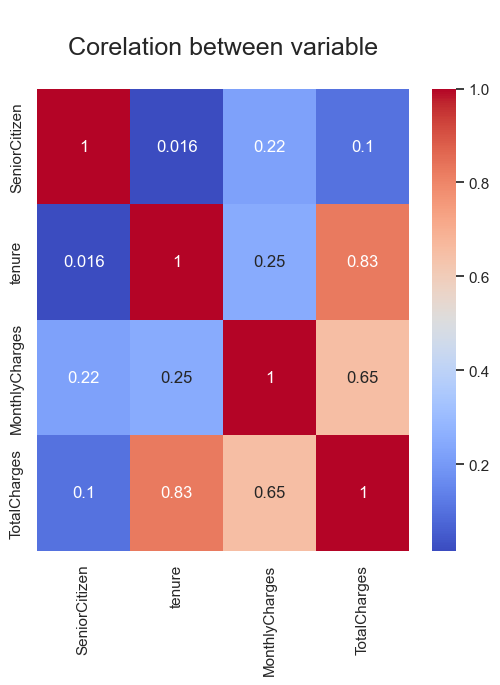

In [208]:
heatmap(data,"Corelation between variable")

int64


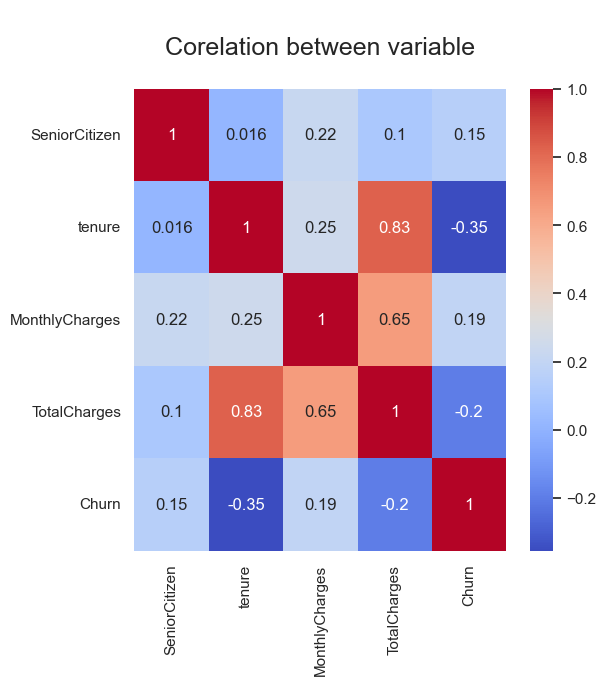

In [209]:
#Chrun column isn't present because it's object dtype
data["Churn"]=data["Churn"].map({"Yes":1,"No":0})
print(data["Churn"].dtypes)
heatmap(data,"Corelation between variable")

### Target HeatMap

In [234]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,8))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

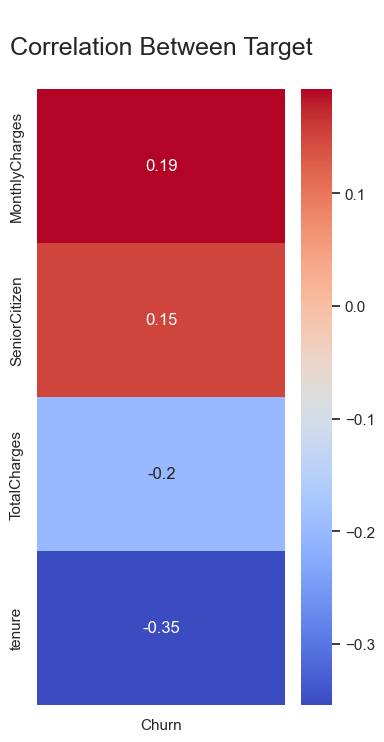

In [235]:
corr_for_target(data, 'Churn', 'Correlation Between Target')

### Drop CustomerID

In [212]:
df=data.drop(["customerID"],axis=1)

### To identify numerical and categorical variable

In [213]:
#To find numerical column in dataset
numerical=df.select_dtypes(["number"]).columns
print(f"numerical columns: {numerical}\n")

#To find categorical columns in dataset
categorical=df.columns.difference(numerical)

df[categorical] = df[categorical].astype('object')

print(f"categorical columns:{categorical}")
cat=list(categorical)
print(cat)

numerical columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

categorical columns:Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')
['Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender']


### To get zeros and ones for categorical variable

In [214]:
df1=pd.get_dummies(df)
print(df1.head(3))

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1          

### To get unique value of all feature

In [215]:
for i in df.columns:
    print("\n",i)
    print("\n",df[i].unique())


 gender

 ['Female' 'Male']

 SeniorCitizen

 [0 1]

 Partner

 ['Yes' 'No']

 Dependents

 ['No' 'Yes']

 tenure

 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

 PhoneService

 ['No' 'Yes']

 MultipleLines

 ['No phone service' 'No' 'Yes']

 InternetService

 ['DSL' 'Fiber optic' 'No']

 OnlineSecurity

 ['No' 'Yes' 'No internet service']

 OnlineBackup

 ['Yes' 'No' 'No internet service']

 DeviceProtection

 ['No' 'Yes' 'No internet service']

 TechSupport

 ['No' 'Yes' 'No internet service']

 StreamingTV

 ['No' 'Yes' 'No internet service']

 StreamingMovies

 ['No' 'Yes' 'No internet service']

 Contract

 ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling

 ['Yes' 'No']

 PaymentMethod

 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

 MonthlyCharges

 [

### Data Visualization

There are people staying with this company for about 70 years


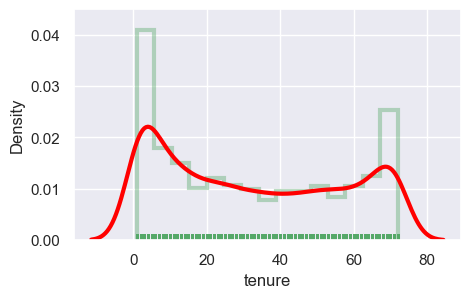

In [216]:
plt.figure(figsize = (5,3))

ax = sns.distplot(df['tenure'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "red", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.4, "color": "g"});
print("There are people staying with this company for about 70 years")

Most of the customer has low monthly charge


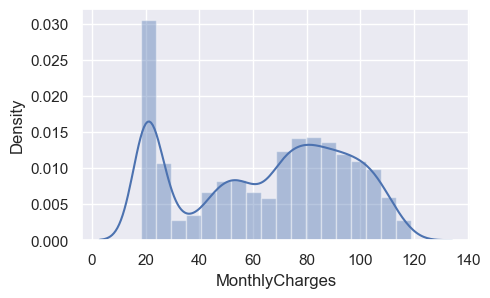

In [217]:
plt.figure(figsize=(5,3))
sns.distplot(df['MonthlyCharges']);
print("Most of the customer has low monthly charge")

In [218]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

Those with lower total charges have left the brand most.


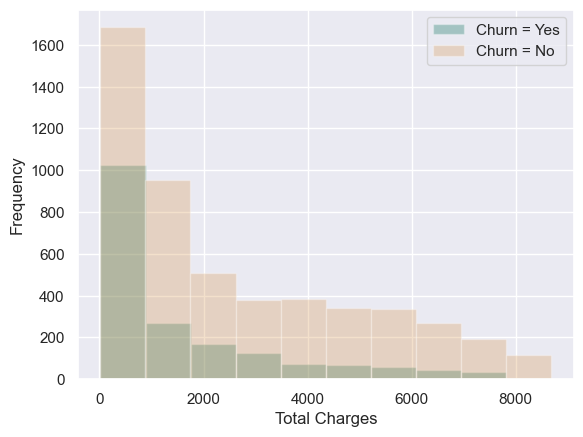

In [224]:
data[data['Churn'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#016a55', label = 'Churn = Yes')

data[data['Churn'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Total Charges')
plt.legend();
print("Those with lower total charges have left the brand most.")

Those who have registered with the brand for 1-8 years has higher number of leaving the brand


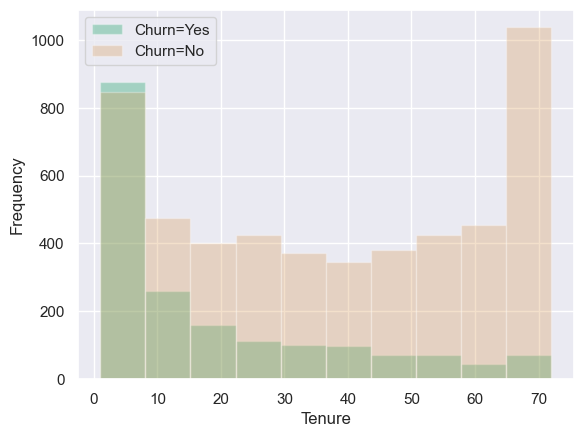

In [227]:
df[df['Churn']==1].tenure.plot(kind='hist',alpha=0.3,color='#019955',label='Churn=Yes')
df[df['Churn']==0].tenure.plot(kind='hist',alpha=0.3,color='#d89955',label='Churn=No')
plt.xlabel("Tenure")
plt.legend();
print("Those who have registered with the brand for 1-8 years has higher number of leaving the brand")

Those low monthly Charges has not felt the company


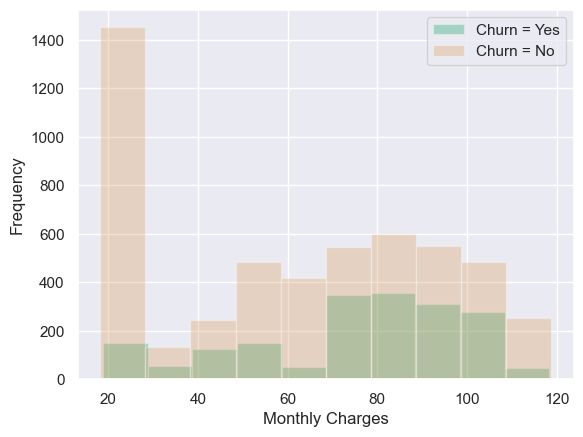

In [225]:
df[df['Churn'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Churn = Yes')

df[df['Churn'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Monthly Charges')
plt.legend();
print("Those low monthly Charges has not felt the company")

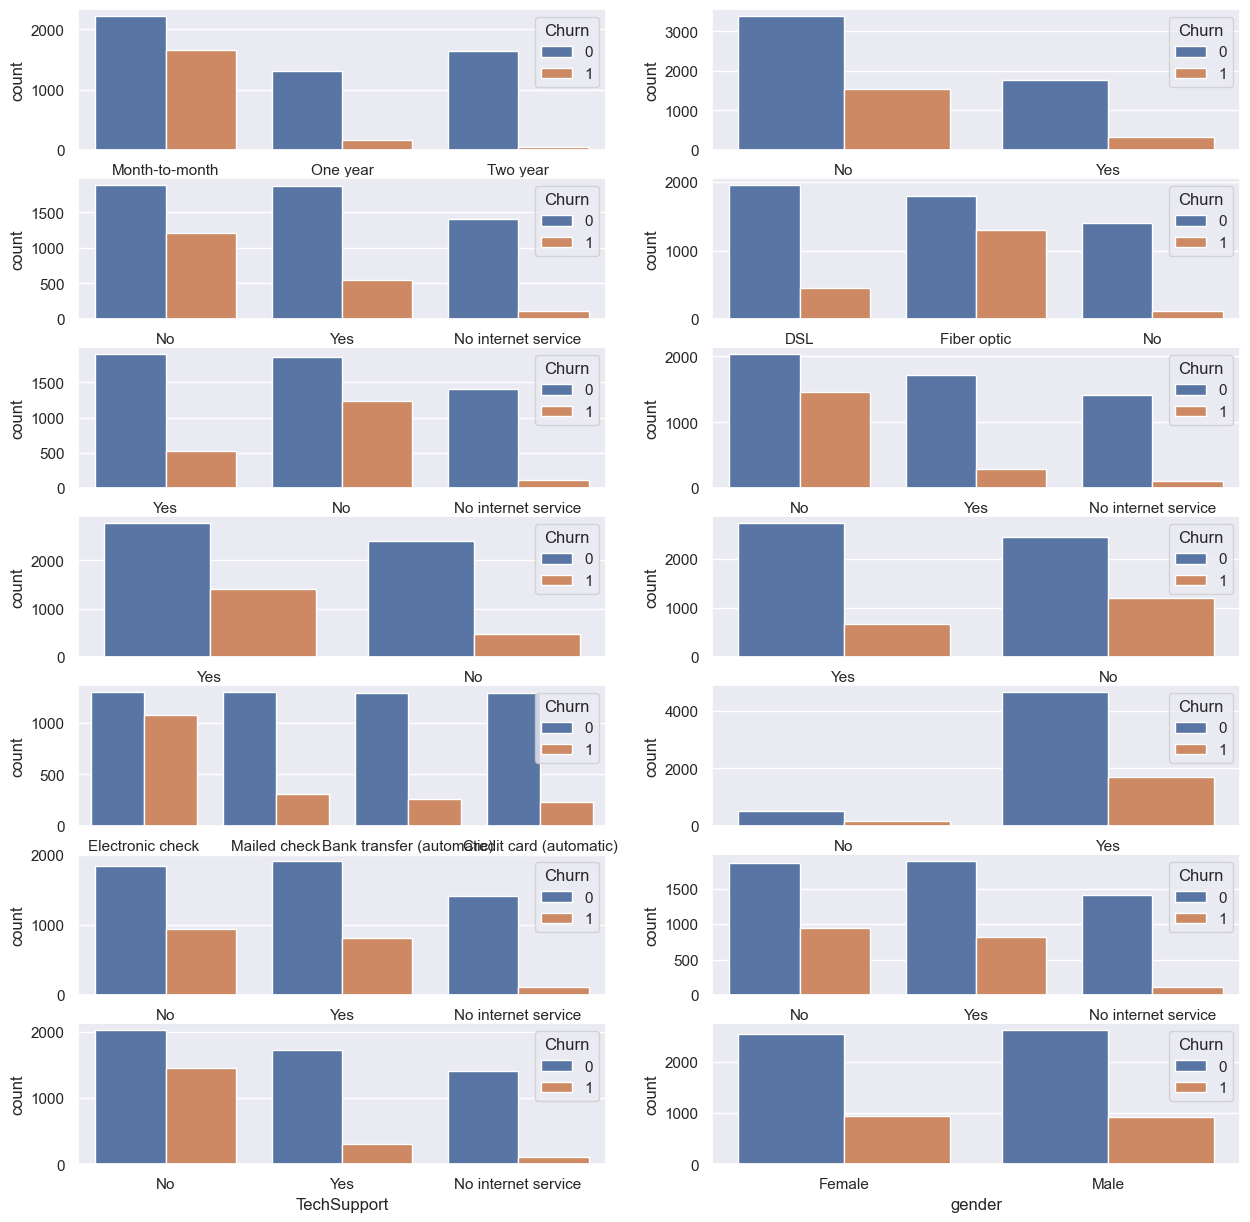

In [187]:
cat_feature=["MultipleLines",'Contract', 'Dependents', 'DeviceProtection', 'InternetService','OnlineBackup',
             'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies', 
             'StreamingTV', 'TechSupport', 'gender']
plt.figure(figsize=(15,15))
for i in range(1,len(cat_feature)):
    plt.subplot(7,2,i)
    sns.countplot(x=cat_feature[i],data=data,hue="Churn")

### Corelation of all the feature with repect to label

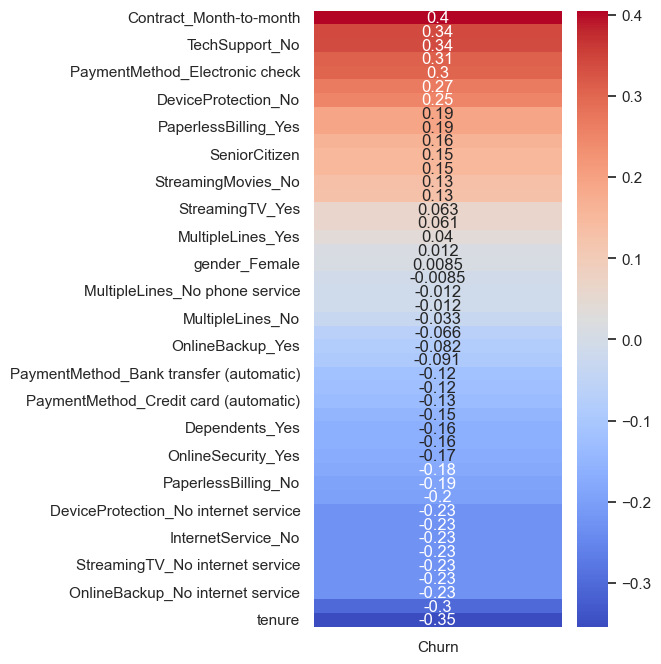

In [237]:
corr_for_target(df1, 'Churn');

## ML Model buliding 

### importing library

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

### split feature and target

In [271]:
x=df1.drop("Churn",axis=1)
y=df1[["Churn"]]

### Spliting the dataset for model building and testing

In [279]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [274]:
models = []
models.append(('Random Forest Clas.', RF()))
models.append(('KNN', KNN()))
models.append(('Decision Tree Clas.', DT()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))

### Cross Validation

In [275]:
model_name=[]
scores=[]
for name,model in models:
    score=cross_val_score(model,x,y,cv=10,scoring="accuracy")
    scores.append(score)
    model_name.append(model)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.7913794775636881
Mean of the KNN model scores : 0.7615188154661839
Mean of the Decision Tree Clas. model scores : 0.7259684549980603
Mean of the LightGBM model scores : 0.7973524586189061
Mean of the GBC model scores : 0.8071673347989139
Mean of the Logistic Reg. model scores : 0.8050348344756241
Mean of the XGB model scores : 0.789959831242726
Mean of the SVC model scores : 0.7342149715504979


### Feature importance by LightGBM

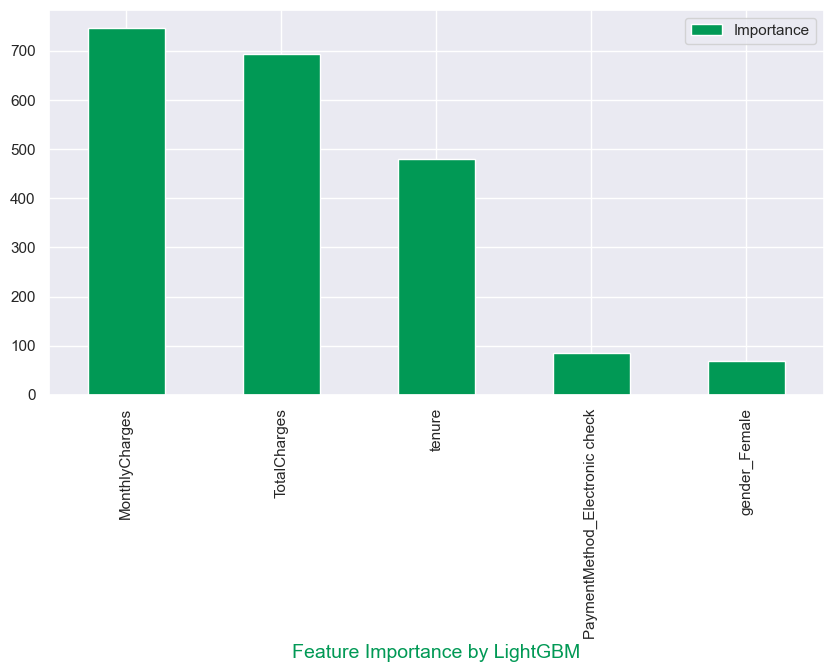

In [276]:
Feature_importance=pd.DataFrame({'Importance':LGBMClassifier().fit(x,y).feature_importances_},index=x.columns)
Feature_importance.sort_values(by="Importance", ascending=False,axis=0)[:5].plot(kind="bar",color='#019955',figsize=(10,5))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 14});

In [283]:
#Model building for all the feature
model=LGBMClassifier()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"LGBM Classifier train accuracy:{train_acc}")
print(f"LGBM Classifier test accuracy:{test_acc}")

LGBM Classifier train accuracy:0.9006580343876035
LGBM Classifier test accuracy:0.7850064627315813


In [288]:
#Model building for the feature importance by LightGBM classifier
x_train_new=x_train[["MonthlyCharges","TotalCharges","tenure","PaymentMethod_Electronic check","gender_Female"]]
x_test_new=x_test[["MonthlyCharges","TotalCharges","tenure","PaymentMethod_Electronic check","gender_Female"]]

model=LGBMClassifier()
model.fit(x_train_new,y_train)
y_pred_test=model.predict(x_test_new)
y_pred_train=model.predict(x_train_new)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"LGBM Classifier train accuracy:{train_acc}")
print(f"LGBM Classifier test accuracy:{test_acc}")
print("CONCLUSION:There isn't much improvement in the model performance")

LGBM Classifier train accuracy:0.861812778603269
LGBM Classifier test accuracy:0.7798362774666092
CONCLUSION:There isn't much improvement in the model performance


### Logistic Regression

In [289]:
#Model building for all the feature
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"LogisticRegression Classifier train accuracy:{train_acc}")
print(f"LogisticRegression Classifier test accuracy:{test_acc}")

LogisticRegression Classifier train accuracy:0.8074718743366589
LogisticRegression Classifier test accuracy:0.8026712623869022


#### Model evalution

In [291]:
print(metrics.classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1823
           1       0.53      0.65      0.59       498

    accuracy                           0.80      2321
   macro avg       0.72      0.75      0.73      2321
weighted avg       0.82      0.80      0.81      2321



In [293]:
#Confusion matrix
print("Train data confusion matrix")
print(metrics.confusion_matrix(y_pred_train,y_train))
print("Test data confusion matrix")
print(metrics.confusion_matrix(y_pred_test,y_test))

Train data confusion matrix
[[3103  558]
 [ 349  701]]
Test data confusion matrix
[[1538  285]
 [ 173  325]]


ROC score for test: 0.8422971898324247
ROC score for train: 0.8468476563183087


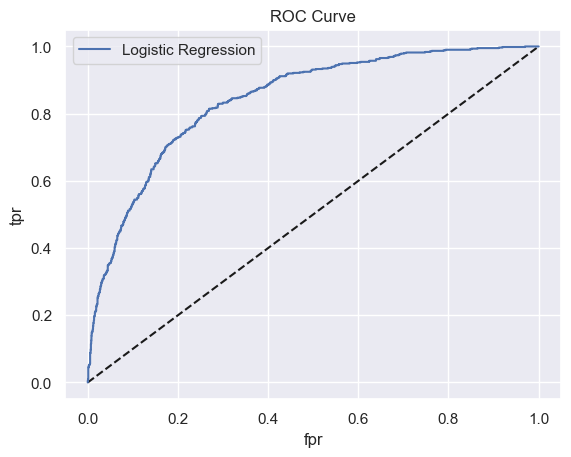

In [306]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)

### Support Vector Machine(SVM)

In [307]:
#Model building for all the feature
model=SVC()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"SVC Classifier train accuracy:{train_acc}")
print(f"SCV Classifier test accuracy:{test_acc}")

SVC Classifier train accuracy:0.73275313097007
SCV Classifier test accuracy:0.7371822490305903


#### evaluation

In [309]:
print(metrics.classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2321
           1       0.00      0.00      0.00         0

    accuracy                           0.74      2321
   macro avg       0.50      0.37      0.42      2321
weighted avg       1.00      0.74      0.85      2321



#### model building after scaling the the feature

In [312]:
model=SVC()
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"SVC Classifier train accuracy:{train_acc}")
print(f"SCV Classifier test accuracy:{test_acc}")
print("CONCLUSION:There is a little improve in accuracy of the model")

SVC Classifier train accuracy:0.8193589471449798
SCV Classifier test accuracy:0.7966393795777682
CONCLUSION:There is a little improve in accuracy of the model


#### Hyperparameter tuning using GridSearch CV

In [314]:
params = {'kernel' : ['rbf'], 'C' : [0.1, 1, 5, 10], 'gamma' : [0.01, 0.1, 0.9, 1]}
grid = GridSearchCV(SVC(), params, cv = 5, return_train_score= False)
grid.fit(x_train_sc,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [318]:
#model tuning
model=SVC(**grid.best_params_,probability=True)
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"SVC Classifier train accuracy:{train_acc}")
print(f"SCV Classifier test accuracy:{test_acc}")

SVC Classifier train accuracy:0.8102313733814477
SCV Classifier test accuracy:0.8000861697544162


ROC score for test: 0.8422971898324247
ROC score for train: 0.8463236194187481


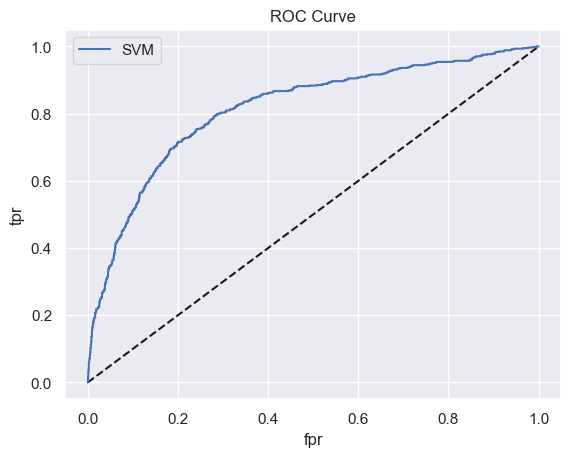

In [319]:
#ROC curve
y_proba_log = model.predict_proba(x_test_sc)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train_sc)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)

### KNN

#### Find optimum k value

In [321]:
testscores = []
trainscores = []

for i in range(1, 10):
    model = KNN(i)
    model.fit(x_train, y_train)
    
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))

CONLUSION:train score and test score forms straight line near 8, therefore k=8


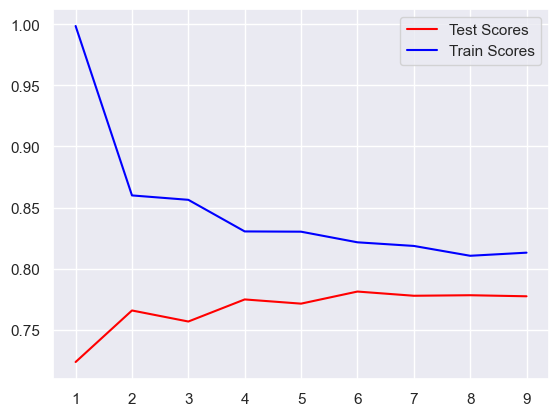

In [323]:
plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')
plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')
plt.legend(); 
print("CONLUSION:train score and test score forms straight line near 8, therefore k=8")

In [324]:
#Model building for all the feature
model=KNN()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"KNN Classifier train accuracy:{train_acc}")
print(f"KNN Classifier test accuracy:{test_acc}")

KNN Classifier train accuracy:0.8301846741668436
KNN Classifier test accuracy:0.7712193020249892


#### evalution

In [325]:
print(metrics.classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1842
           1       0.46      0.58      0.51       479

    accuracy                           0.77      2321
   macro avg       0.67      0.70      0.68      2321
weighted avg       0.80      0.77      0.78      2321



In [326]:
print(metrics.confusion_matrix(y_pred_test,y_test))

[[1511  331]
 [ 200  279]]


ROC score for test: 0.8422971898324247
ROC score for train: 0.8883188205982971


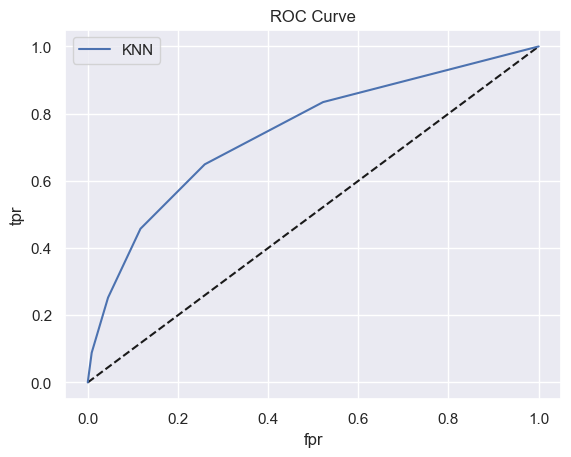

In [327]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)

### Decision Tree Classifier

In [329]:
#Model building for all the feature
model=DT()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"DT Classifier train accuracy:{train_acc}")
print(f"DT Classifier test accuracy:{test_acc}")

DT Classifier train accuracy:0.9987263850562513
DT Classifier test accuracy:0.7221025420077553


#### evalution

In [330]:
print(metrics.classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1680
           1       0.50      0.47      0.48       641

    accuracy                           0.72      2321
   macro avg       0.65      0.64      0.65      2321
weighted avg       0.72      0.72      0.72      2321



ROC score for test: 0.8422971898324247
ROC score for train: 0.9999952830926713


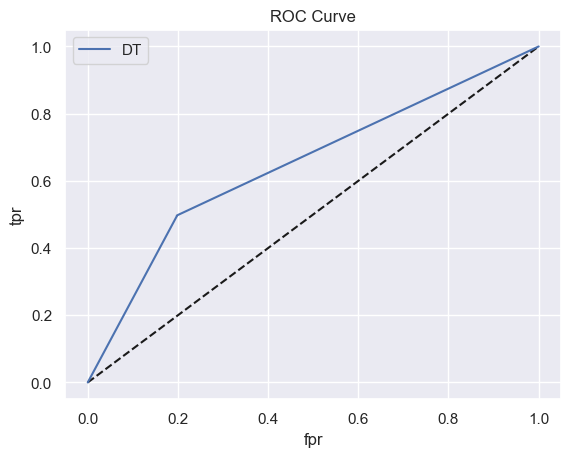

In [331]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'DT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)


### Random Forest Classifier

In [332]:
#Model building for all the feature
model=RF()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")

RF Classifier train accuracy:0.9987263850562513
RF Classifier test accuracy:0.7837139164153382


#### Feature importance using Random Forest

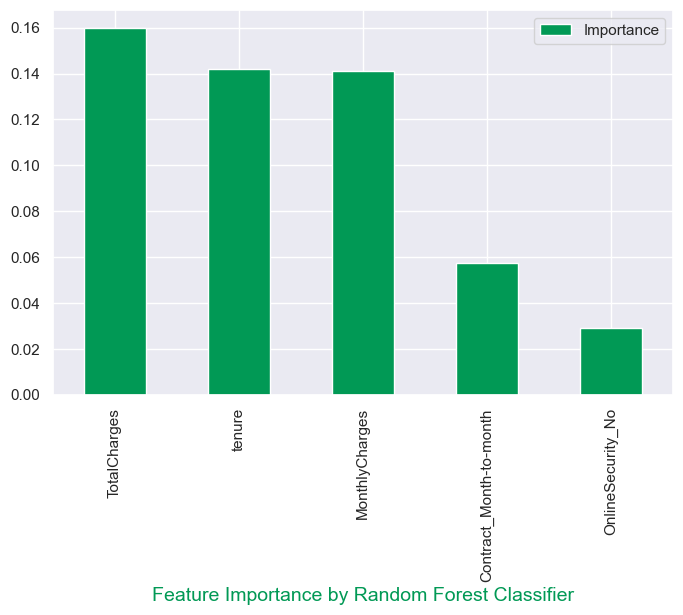

In [337]:
feature_importance_ = pd.DataFrame({'Importance' : RF().fit(x, y).feature_importances_}, index = x.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (8, 5))
plt.xlabel("Feature Importance by Random Forest Classifier", color = "#019955", fontdict= {"fontsize" : 14});

#### training the model on the feature importance feature

In [341]:
x_train_new_ = x_train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No']]
x_test_new_ = x_test[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No']]

model=RF()
model.fit(x_train_new,y_train)
y_pred_test=model.predict(x_test_new)
y_pred_train=model.predict(x_train_new)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")
print("CONCLUSION:There is no improvement in accuracy and Overfitting has been identified~ performs very well on train data compared to test data")

RF Classifier train accuracy:0.9959668860114625
RF Classifier test accuracy:0.7613097802671263
CONCLUSION:There is no improvement in accuracy and Overfitting has been identified~ performs very well on train data compared to test data


#### Hyperparameter tuning using GridsearchCV

In [343]:
params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}

grid = GridSearchCV(RF(), params_grid, cv = 3, scoring = 'f1')
grid.fit(x_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
0.5865676990928473


In [347]:
#model tuning
model=RF(**grid.best_params_)
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")
print("CONCLUSION:Overfitting has been resolved greatly")

RF Classifier train accuracy:0.8378263638293356
RF Classifier test accuracy:0.8005170185264971
CONCLUSION:Overfitting has been resolved greatly


#### evaluation

In [350]:
print(metrics.confusion_matrix(y_pred_test,y_test))
print(metrics.classification_report(y_pred_test,y_test))

[[1566  318]
 [ 145  292]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1884
           1       0.48      0.67      0.56       437

    accuracy                           0.80      2321
   macro avg       0.70      0.75      0.71      2321
weighted avg       0.83      0.80      0.81      2321



ROC score for test: 0.8422971898324247
ROC score for train: 0.8167576991432256


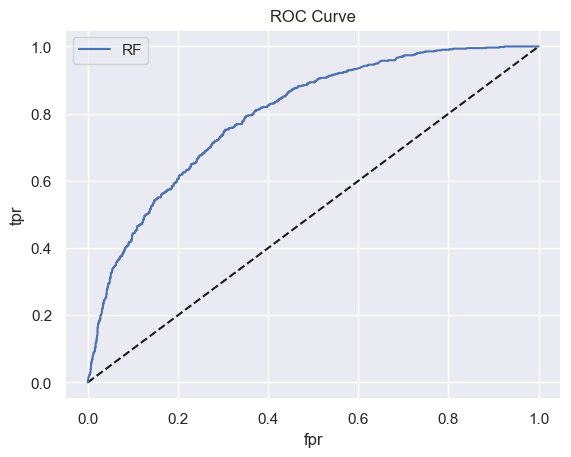

In [351]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)


### XGBoost

In [363]:
#Model building for all the feature
model=XGBClassifier()
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"XGBoost Classifier train accuracy:{train_acc}")
print(f"XGBoost Classifier test accuracy:{test_acc}")

XGBoost Classifier train accuracy:0.9615792825302484
XGBoost Classifier test accuracy:0.7686342093925033


ROC score for test: 0.8422971898324247
ROC score for train: 0.5940731944369024


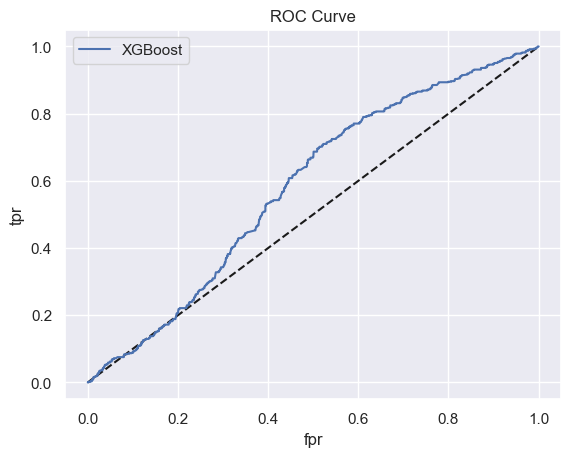

In [364]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)

#### Hyperparameter tuning using GridSearchCV

In [357]:
param = {'learning_rate' : [0.01, 0.03, 0.05], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600]}
grid = GridSearchCV(XGBClassifier(), param, cv = 5)
grid.fit(x_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 600}
0.804287486519285


In [365]:
#model tuning
model=XGBClassifier(**grid.best_params_)
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")
print("CONCLUSION:The performance of the model show good fit")

RF Classifier train accuracy:0.8098068350668648
RF Classifier test accuracy:0.8065489013356312
CONCLUSION:The performance of the model show good fit


#### evalution

In [360]:
print(metrics.classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1834
           1       0.53      0.67      0.59       487

    accuracy                           0.81      2321
   macro avg       0.72      0.75      0.73      2321
weighted avg       0.83      0.81      0.81      2321



ROC score for test: 0.8422971898324247
ROC score for train: 0.8111704648891825


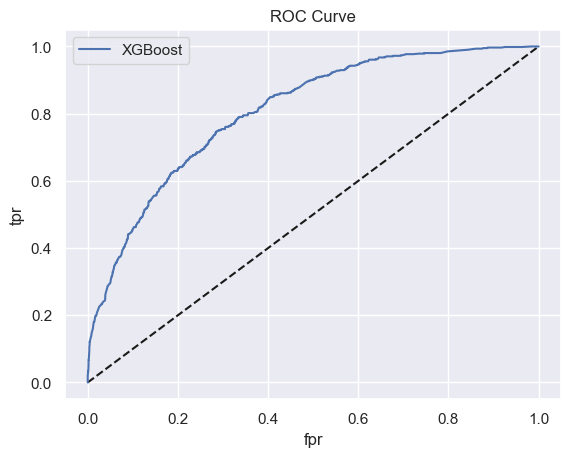

In [361]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)

### Gradient Boosting Classifier

In [366]:
#Model building for all the feature
model=GradientBoostingClassifier()
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"XGBoost Classifier train accuracy:{train_acc}")
print(f"XGBoost Classifier test accuracy:{test_acc}")

XGBoost Classifier train accuracy:0.8282742517512206
XGBoost Classifier test accuracy:0.7996553209823352


#### hyperparameter tuning using GridSearchCV

In [367]:
param= {'learning_rate' : [0.01, 0.03, 0.05, 0.1], 'max_depth' : [1, 4, 6], 
                   'n_estimators' : [100, 300, 400, 600, 800]}
grid = GridSearchCV(GradientBoostingClassifier(), param, cv = 5,scoring = 'f1')
grid.fit(x_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 600}
0.5984668361905707


In [369]:
#model tuning
model=GradientBoostingClassifier(**grid.best_params_)
model.fit(x_train_sc,y_train)
y_pred_test=model.predict(x_test_sc)
y_pred_train=model.predict(x_train_sc)
test_acc=metrics.accuracy_score(y_pred_test,y_test)
train_acc=metrics.accuracy_score(y_pred_train,y_train)
print(f"RF Classifier train accuracy:{train_acc}")
print(f"RF Classifier test accuracy:{test_acc}")
print("CONCLUSION:The performance of the model show good fit")

RF Classifier train accuracy:0.8098068350668648
RF Classifier test accuracy:0.8065489013356312
CONCLUSION:The performance of the model show good fit


ROC score for test: 0.8422971898324247
ROC score for train: 0.805082663225702


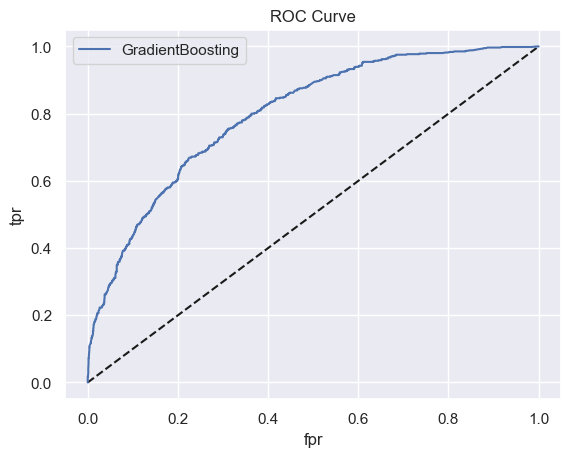

In [370]:
#ROC curve
y_proba_log = model.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)
#ploting ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'GradientBoosting')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();
auc_test=metrics.roc_auc_score(y_test,y_proba_log )
print("ROC score for test:",auc)
y_proba_log_train = model.predict_proba(x_train)[:, 1]
auc_train=metrics.roc_auc_score(y_train, y_proba_log_train)
print("ROC score for train:",auc_train)